<b> Problem 1: A story by James R. Hagerty entitled With Buyers Sidelined, Home Prices Slide
published in the Thursday October 25, 2007 edition of the Wall Street Journal contained data
on so-called fundamental housing indicators in major real estate markets across the US. The
author argues that prices are generally falling and overdue loan payments are piling up. Thus,
we shall consider data presented in the article on: 


Y = Percentage change in average price from July 2006 to July 2007 (based on the S& P/Case-
Shiller national housing index); and

x = Percentage of mortgage loans 30 days or more overdue in latest quarter (based on data
from Equifax and Moodys).

The data are available in the file indicators.txt. Fit the following model to the data: Y =
$\beta 0$ + $\beta x$ + e. Complete the following tasks:

<ul>
    <li>(a) Calculate the R2 and adjusted R2 for the SLR model1. Provide an interpretation of
both quantities.</li>
    
<li>(b) Find a 95% confidence interval for the slope of the regression model, Beta1. On the basis of
this confidence interval decide whether there is evidence of a significant negative linear
association.</li>

<li>(c) Use the fitted regression model to estimate E(Y|X = 4). Find a 95% confidence interval
for E(Y|X = 4). Is 0% a feasible value for E(Y|X = 4)? Give a reason to support your
answer.</li>
</ul>
    </b>

<b>(a) Calculate the R2 and adjusted R2 for the SLR model1. Provide an interpretation of both quantities.

### Read data

In [442]:
# install.packages("readxl")
# install.packages("ggrepel")

In [4]:
library("readxl")
library("ggplot2")
library("ggrepel")
library(repr)
options(repr.plot.width=6, repr.plot.height=4)
df = read_excel("indicators.xlsx")

In [5]:
head(df,3)

MetroArea,PriceChange,LoanPaymentsOverdue
Atlanta,1.2,4.55
Boston,-3.4,3.31
Chicago,-0.9,2.99


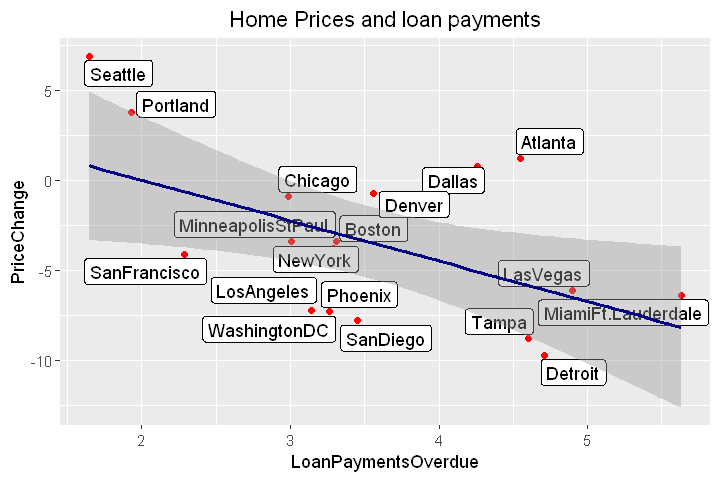

In [6]:
ggplot(data = df, aes(LoanPaymentsOverdue, PriceChange))+
    theme_minimal()+
    theme_update(plot.title = element_text(hjust = 0.5))+
    theme_set(theme_bw())+
    geom_point(color='red')+
    geom_label_repel(aes(label = MetroArea),
                  box.padding   = 0.1, 
                  point.padding = 0.5,
                  segment.color = 'blue') +
    labs(title='Home Prices and loan payments')+
    geom_smooth(method = lm, color='navyblue')

In [66]:
model = lm(PriceChange~LoanPaymentsOverdue, data = df)
summary(model)


Call:
lm(formula = PriceChange ~ LoanPaymentsOverdue, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6541 -3.3419 -0.6944  2.5288  6.9163 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)           4.5145     3.3240   1.358   0.1933  
LoanPaymentsOverdue  -2.2485     0.9033  -2.489   0.0242 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.954 on 16 degrees of freedom
Multiple R-squared:  0.2792,	Adjusted R-squared:  0.2341 
F-statistic: 6.196 on 1 and 16 DF,  p-value: 0.02419


* The multiple R-squared value is <b>0.2792</b> and adjusted R-squared is <b>0.2341</b>. This means <b>27.92 %</b> of the variation in price change in explained by load payments overdue.
* Residual standard error is <b>3.954 </b>

* Adjusted R-square: R-sq = 1 - RSS/TSS; Adjusted R-square is defined similarly except that RSS is normalized by its df and TSS is normalized by its df.

In [76]:
adjusted_R_sq = 1 - sum(model$res^2)/(length(df$MetroArea)-2)/(sum((df$PriceChange-mean(df$PriceChange))^2)/(length(df$MetroArea)-1))
adjusted_R_sq

[1] 0.2340997

<b>(b) Find a 95% confidence interval for the slope of the regression model, Beta1. On the basis of this confidence interval decide whether there is evidence of a significant negative linear association.

In [80]:
confint(model,'LoanPaymentsOverdue',level=0.95)

,2.5 %,97.5 %
LoanPaymentsOverdue,-4.163454,-0.3335853


* From 95% confidence interval for slope it is clear that we have significant negative correlation between LoanPaymentsOverdue and price change 

<b>(c) Use the fitted regression model to estimate E(Y|X = 4). Find a 95% confidence interval for E(Y|X = 4). Is 0% a feasible value for E(Y|X = 4)? Give a reason to support your answer.

In [84]:
predict(model, data.frame(LoanPaymentsOverdue = 4))

1 
-4.479585

In [87]:
predict(model, newdata=data.frame(LoanPaymentsOverdue = 4), se=TRUE, interval="confidence")$fit

fit,lwr,upr
-4.479585,-6.648849,-2.310322


* 6.648849-2.310322 = 4.338527; 95% confidence interval when LoadPaymentsOverdue is 4 is 4.338527.
* Since 95% confidence interval for price change when loan payments overdue is 4 is between -6.648849 and -2.310322, value of 0 is not feasible. Value 0 is outside the confidence interval of 95% confidence.

________________________________________________

<b>Problem 2: Using the sat data from the faraway library:
<ul><li>(a) Fit a model with total sat score as the response and expend, ratio and salary as predic-
tors.</li>
<li>(b) Test the hypothesis that Betasalary = 0.</li>
<li>(c) Test the hypothesis that Betasalary = Betaratio = Betaexpend = 0. Do any of these predictors have
an effect on the response?.</li>
<li>(d) Now add takers to the model. Test the hypothesis that Betatakers = 0. Compare this model
to the previous one using an F-test. Demonstrate that the F-test is equivalent to the
t-test.</li></ul></b>

In [3]:
# install.packages('faraway')
library("faraway")

In [4]:
data(sat)

In [400]:
head(sat, 3)

,expend,ratio,salary,takers,verbal,math,total
Alabama,4.405,17.2,31.144,8,491,538,1029
Alaska,8.963,17.6,47.951,47,445,489,934
Arizona,4.778,19.3,32.175,27,448,496,944


In [401]:
cor(sat)

,expend,ratio,salary,takers,verbal,math,total
expend,1.0000000,-0.371025386,0.869801513,0.5926274,-0.41004987,-0.34941409,-0.38053700
ratio,-0.3710254,1.000000000,-0.001146081,-0.2130536,0.06376664,0.09542173,0.08125382
salary,0.8698015,-0.001146081,1.000000000,0.6167799,-0.47696364,-0.40131282,-0.43988338
takers,0.5926274,-0.213053607,0.616779867,1.0000000,-0.89326296,-0.86938393,-0.88711868
verbal,-0.4100499,0.063766636,-0.476963635,-0.8932630,1.00000000,0.97025604,0.99150325
math,-0.3494141,0.095421730,-0.401312817,-0.8693839,0.97025604,1.00000000,0.99350238
total,-0.3805370,0.081253823,-0.439883381,-0.8871187,0.99150325,0.99350238,1.00000000


<b>2.a) Fit a model with total sat score as the response and expend, ratio and salary as predictors.

In [402]:
model2.a = lm(total~expend+ratio+salary, data = sat)
summary(model2.a)


Call:
lm(formula = total ~ expend + ratio + salary, data = sat)

Residuals:
     Min       1Q   Median       3Q      Max 
-140.911  -46.740   -7.535   47.966  123.329 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1069.234    110.925   9.639 1.29e-12 ***
expend        16.469     22.050   0.747   0.4589    
ratio          6.330      6.542   0.968   0.3383    
salary        -8.823      4.697  -1.878   0.0667 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68.65 on 46 degrees of freedom
Multiple R-squared:  0.2096,	Adjusted R-squared:  0.1581 
F-statistic: 4.066 on 3 and 46 DF,  p-value: 0.01209


<b>(b) Test the hypothesis that Betasalary = 0. </b> </font>

to test this hypothesis, we have below null and alternate hypothesis:
* Null Hypothesis: $\beta salary$ = 0 
* Alternate Hypothesis: $\beta salary$ $\not=$ 0

In [409]:
model2.a_salary_reduced= lm(total ~ expend + ratio, data = sat)

In [410]:
summary(model2.a_salary_reduced)


Call:
lm(formula = total ~ expend + ratio, data = sat)

Residuals:
     Min       1Q   Median       3Q      Max 
-147.694  -51.816    6.258   37.756  127.742 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1136.336    107.803  10.541 5.69e-14 ***
expend       -22.308      7.956  -2.804  0.00731 ** 
ratio         -2.295      4.784  -0.480  0.63370    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 70.48 on 47 degrees of freedom
Multiple R-squared:  0.149,	Adjusted R-squared:  0.1128 
F-statistic: 4.114 on 2 and 47 DF,  p-value: 0.02258


In [411]:
anova(model2.a_salary_reduced, model2.a)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
47,233442.9,NA,NA,NA,NA
46,216811.9,1,16631.01,3.528526,0.06666771


* since p value is greater than significance level 0.05, we accept null hypothesis. i.e. $\beta Salary$ is zero.

<b>(c) Test the hypothesis that Betasalary = Betaratio = Betaexpend = 0. Do any of these predictors have an effect on the response?</b>

In [403]:
summary(model2.a)


Call:
lm(formula = total ~ expend + ratio + salary, data = sat)

Residuals:
     Min       1Q   Median       3Q      Max 
-140.911  -46.740   -7.535   47.966  123.329 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1069.234    110.925   9.639 1.29e-12 ***
expend        16.469     22.050   0.747   0.4589    
ratio          6.330      6.542   0.968   0.3383    
salary        -8.823      4.697  -1.878   0.0667 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68.65 on 46 degrees of freedom
Multiple R-squared:  0.2096,	Adjusted R-squared:  0.1581 
F-statistic: 4.066 on 3 and 46 DF,  p-value: 0.01209


In [404]:
model2.a_reduced = lm(total ~ 1, data = sat)

for F test using anova for testing all predictors;
* Null hypothesis: $\beta $ associated with all predictors is zero and intercept only model is good (reduced model)
* Alternate hypothesis: atleast one of the predictors do not have $\beta $ equal to zero.

In [405]:
anova(model2.a_reduced, model2.a)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
49,274307.7,NA,NA,NA,NA
46,216811.9,3,57495.74,4.066203,0.01208607


* As shown in the summary output of lm function or in the anova table, p value is lower than 0.05 hence we accept alternate hypothesis. i.e. atleast one of the $\beta$ of predictors is not equal to zero.

<b>(d) Now add takers to the model. Test the hypothesis that Betatakers = 0. Compare this model to the previous one using an F-test. Demonstrate that the F-test is equivalent to the t-test.

In [6]:
model2.b = lm(total~expend+ratio+salary+takers, data = sat)
summary(model2.b)


Call:
lm(formula = total ~ expend + ratio + salary + takers, data = sat)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.531 -20.855  -1.746  15.979  66.571 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1045.9715    52.8698  19.784  < 2e-16 ***
expend         4.4626    10.5465   0.423    0.674    
ratio         -3.6242     3.2154  -1.127    0.266    
salary         1.6379     2.3872   0.686    0.496    
takers        -2.9045     0.2313 -12.559 2.61e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.7 on 45 degrees of freedom
Multiple R-squared:  0.8246,	Adjusted R-squared:  0.809 
F-statistic: 52.88 on 4 and 45 DF,  p-value: < 2.2e-16


In [8]:
((68.65**2*46) - (32.7**2*45))/(32.7**2)

[1] 157.7419

In [191]:
summary(model2.b)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1045.971536,52.869760,19.7839283,7.857530e-24
expend,4.462594,10.546528,0.4231339,6.742130e-01
ratio,-3.624232,3.215418,-1.1271418,2.656570e-01
salary,1.637917,2.387248,0.6861110,4.961632e-01
takers,-2.904481,0.231260,-12.5593745,2.606559e-16


In [413]:
anova(model2.a, model2.b)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
46,216811.9,NA,NA,NA,NA
45,48123.9,1,168688,157.7379,2.606559e-16


P value associated with t test of Beta Takers=0, is very low, hence we conclude that Betatakers is not equal to zero.

Here,

* null hypothesis: reduced model i.e. model2.a and full model i.e. model2.b do not differ significantly.

* alternative hypothesis: full model is significantly better.

* Since P value associated with the F test is very low, we reject the null hypothesis and accept the alternative hypothesis i.e. full model is significantly better.

In [412]:
summary(model2.b)$coef[5,3]**2

[1] 157.7379

We can see, Square of t-test = F-test

__________

<b> Problem 3: For the prostate data from the faraway library, fit a model with lpsa as the
response and the other variables as predictors:
<ul>
<li> (a) Compare 90% and 95% CIs for the parameter associated with age. Comment on your results.</li>
<li> (b) Remove all predictors that are not significant at the 5% level. Test this model against the original model. Which model is preferred?</li>
<li> (c) Compute and display a 95% joint confidence region for the parameters associated with age and lbph. Plot the origin on this display. The location of the origin on the display tell us the outcome of a certain hypothesis test. State that test and its outcome.</li>
<li> (d) In a video class we discussed a permutation test corresponding to the F - test for the significance of a set of predictors. Execute the permutation test corresponding to the t-test for age in this model. (Hint: summary(g)$coef[4; 3] gets you the t-statistic you need if the model is called g.)</li>
</ul>
</b>

<b>(a) Compare 90% and 95% CIs for the parameter associated with age. Comment on your results.

In [201]:
data(prostate)

Explaination of column headings: 
<ol>
    <li>
lcavol
log(cancer volume)</li>
<li>
lweight
log(prostate weight)</li>
<li>
age
age</li>
<li>
lbph
log(benign prostatic hyperplasia amount)</li>
<li>
svi
seminal vesicle invasion</li>
<li>
lcp
log(capsular penetration)</li>
<li>
gleason
Gleason score</li>
<li>
pgg45
percentage Gleason scores 4 or 5</li>
<li>
lpsa
log(prostate specific antigen)</li>
    </ol>

In [158]:
head(prostate, 2)

lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
-0.5798185,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
-0.9942523,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252


In [227]:
model3.a = lm(lpsa~., data = prostate)

In [228]:
confint(model3.a, 'age', level=0.95)

,2.5 %,97.5 %
age,-0.04184062,0.002566267


In [229]:
confint(model3.a, 'age', level=0.90)

,5 %,95 %
age,-0.0382102,-0.001064151


The beta parameter associated with age is very close to zero. We need to do hypothesis testing in order to check the signficance of age variable in the regression model of prostate data.

<b>(b) Remove all predictors that are not significant at the 5% level. Test this model against the original model. Which model is preferred?

In [230]:
summary(model3.a)


Call:
lm(formula = lpsa ~ ., data = prostate)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7331 -0.3713 -0.0170  0.4141  1.6381 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.669337   1.296387   0.516  0.60693    
lcavol       0.587022   0.087920   6.677 2.11e-09 ***
lweight      0.454467   0.170012   2.673  0.00896 ** 
age         -0.019637   0.011173  -1.758  0.08229 .  
lbph         0.107054   0.058449   1.832  0.07040 .  
svi          0.766157   0.244309   3.136  0.00233 ** 
lcp         -0.105474   0.091013  -1.159  0.24964    
gleason      0.045142   0.157465   0.287  0.77503    
pgg45        0.004525   0.004421   1.024  0.30886    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7084 on 88 degrees of freedom
Multiple R-squared:  0.6548,	Adjusted R-squared:  0.6234 
F-statistic: 20.86 on 8 and 88 DF,  p-value: < 2.2e-16


* By looking at the summary, at 5% significance level, we can eliminate age, lbph, lcp, gleason, pgg45. So only lcavol, lweight, svi will remain

In [231]:
model3.b = lm(lpsa ~ lcavol+lweight+svi, data=prostate)
summary(model3.b)


Call:
lm(formula = lpsa ~ lcavol + lweight + svi, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.72964 -0.45764  0.02812  0.46403  1.57013 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.26809    0.54350  -0.493  0.62298    
lcavol       0.55164    0.07467   7.388  6.3e-11 ***
lweight      0.50854    0.15017   3.386  0.00104 ** 
svi          0.66616    0.20978   3.176  0.00203 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7168 on 93 degrees of freedom
Multiple R-squared:  0.6264,	Adjusted R-squared:  0.6144 
F-statistic: 51.99 on 3 and 93 DF,  p-value: < 2.2e-16


In [232]:
anova(model3.b, model3.a)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
93,47.78486,NA,NA,NA,NA
88,44.16302,5,3.621837,1.443387,0.2167334


* Null hypothesis: there is not significant difference between full model i.e. model3.a and reduced model i.e. model3.b.
* Alternate hypothesis: full model is better.
* From anova results, we got p value of 0.2167334 which is greater than the 5% significance level. Hence we can reject null hypothesis and accept that full model is better and should be preffered.

<b>(c) Compute and display a 95% joint confidence region for the parameters associated with age and lbph. Plot the origin on this display. The location of the origin on the display tell us the outcome of a certain hypothesis test. State that test and its outcome.

In [167]:
# install.packages("ellipse")
library(ellipse)

In [233]:
model3.a$coef

(Intercept)       lcavol      lweight          age         lbph          svi 
 0.669336698  0.587021826  0.454467424 -0.019637176  0.107054031  0.766157326 
         lcp      gleason        pgg45 
-0.105474263  0.045141598  0.004525231

In [237]:
CR95 = ellipse(model3.a, c(4,5), level=0.95)
head(CR95,3)

age,lbph
-0.002508614,0.1966607
-0.003933479,0.2037540
-0.005421577,0.2104578


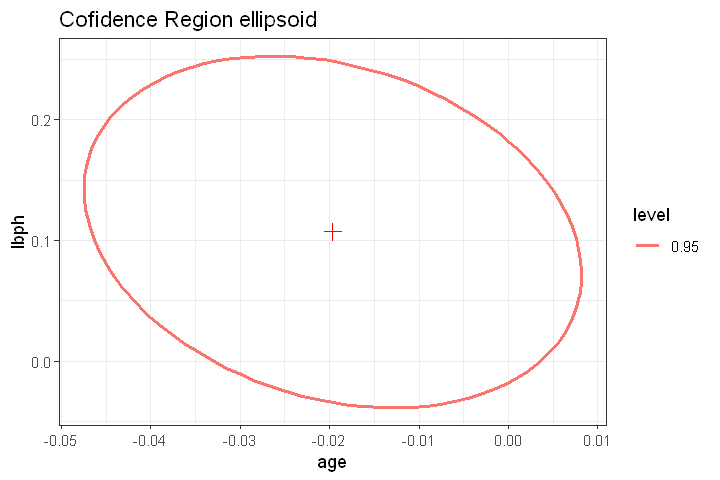

In [258]:
myCR = data.frame(CR95)
myCR[, 'level'] = as.factor(c(rep(0.95, dim(CR95)[1])))

ggplot(data = myCR, aes(x=age, y=lbph, color=level))+
    geom_path(size=1)+
    geom_point(x=coef(model3.a)[4], y=coef(model3.a)[5], shape=3, size=3, colour='red')+
    labs(title='Cofidence Region ellipsoid')

* The center of the ellipse is the value of $\beta $Age and $\beta $lbph from full model
* We have obtained combined confidence region of age and lbph with 0.95 significance level.
* It displays F test outcome. The points lying inside this region will have 95% significance level and points lying outside this region will have 5% probability of occuring.

<b>(d) In a video class we discussed a permutation test corresponding to the F - test for the significance of a set of predictors. Execute the permutation test corresponding to the t-test for age in this model. (Hint: summary(g)$coef[4; 3] gets you the t-statistic you need if the model is called g.)

<ol>
    <li>
    Null Hypothesis: Age does not have any effect on lpsa
    Alternate Hypothesis: Age is a significant factor while determining lpsa
    </li>
    <li>
    Test Statistic: t-test
    </li>
    
</ol>

In [225]:
head(prostate,2)

lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
-0.5798185,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
-0.9942523,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252


In [220]:
full_model = lm(lpsa~., data= prostate)
summary(full_model)$coef[4,3]

[1] -1.757599

In [224]:
set.seed(41)
n.iter = 10000; 
ttest = numeric(n.iter);
data_points = length(prostate$age)

for (i in 1:n.iter) {
    data_with_New_age = prostate;
    data_with_New_age[ , 3] = prostate[sample(data_points), 3];
    model = lm(lpsa~., data = data_with_New_age);
    ttest[i] = summary(model)$coef[4,3]
}

estimated_p_value = length(ttest[ttest > summary(full_model)$coef[4,3]])/n.iter
estimated_p_value

[1] 0.9553

* We got the p-value of 0.9553 from this permutation test of t-statistic. Hence null hypothesis is accepted i.e. $\beta$ age = 0.

___________

<b> Problem 4: For the fat data set from the faraway library, fit a model with brozek as the
response and variables age, weight, height, neck, chest, abdom, hip, thigh, knee,
ankle, biceps, forearm, wrist as predictors.
<ul>
<li>(a) Relative to the full model, test whether the variables chest and abdom have the same
effect on the response variable brozek. This is equivalent to test: H0 : Betachest = Betaabdom</li>
<li>(b) Consider a smaller model using only age, weight, height and abdom. Is it justifiable to
use this smaller model? Do an appropriate test to answer this question.</li>
<li>(c) Compare a 95% prediction interval for the median values of the predictors and compare
the results to the 95% prediction interval using the full model. Do the intervals differ
by a practically important amount?</li>
<li>(d) For the smaller model, examine all observations from case numbers 25 to 50. Which
observations seem particularly anomalous?</li>
<li>(e) Recompute the 95% prediction interval for median predictor values after two anomalous
cases have been excluded from the data. Did this make much difference to the outcome?</li>
</ul>
    </b>

<b>(a) Relative to the full model, test whether the variables chest and abdom have the same effect on the response variable brozek. This is equivalent to test: H0 : $\beta$chest = $\beta$abdom.

In [1]:
library('faraway')
data(fat)
head(fat,3)

Warning message:
"package 'faraway' was built under R version 3.6.3"

brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6


In [2]:
# fit the full model
model4.a = lm(brozek ~ age + weight + height + neck + chest + abdom + hip + thigh + knee + ankle + biceps + forearm + wrist,
              data = fat)

to test this hypothesis, following two models with chest removed and abdom removed are fit and these are compared with the full model.

fit the reduced model after removing $\beta Chest$

In [11]:
model4.a_reduced_chest = lm(brozek ~ age + weight + height + neck + abdom + hip + thigh + knee + ankle + biceps + forearm + wrist,
              data = fat)

In [12]:
anova(model4.a_reduced_chest, model4.a)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
239,3786.186,NA,NA,NA,NA
238,3785.136,1,1.050493,0.0660524,0.7973957


fit the reduced model after removing $\beta Abdom$

In [13]:
model4.a_reduced_abdom = lm(brozek ~ age + weight + height + neck + chest + hip + thigh + knee + ankle + biceps + forearm + wrist,
              data = fat)

In [14]:
anova(model4.a_reduced_abdom, model4.a)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
239,5729.592,NA,NA,NA,NA
238,3785.136,1,1944.456,122.2626,3.30657e-23


* As can be seen from above two anova tables, the F statistic value for both tables is very different, hence $\beta$chest is not equal to $\beta$abdom.

<b>(b) Consider a smaller model using only age, weight, height and abdom. Is it justifiable to use this smaller model? Do an appropriate test to answer this question.

In [15]:
model4.b = lm(brozek ~ age + weight + height + abdom, data = fat)
summary(model4.b)


Call:
lm(formula = brozek ~ age + weight + height + abdom, data = fat)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5105  -2.9346   0.0087   2.8942   9.4179 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -32.769636   6.541902  -5.009 1.04e-06 ***
age          -0.007051   0.024342  -0.290    0.772    
weight       -0.123722   0.025046  -4.940 1.44e-06 ***
height       -0.116694   0.082727  -1.411    0.160    
abdom         0.889704   0.067267  13.226  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.126 on 247 degrees of freedom
Multiple R-squared:  0.7211,	Adjusted R-squared:  0.7166 
F-statistic: 159.7 on 4 and 247 DF,  p-value: < 2.2e-16


In [16]:
anova(model4.b, model4.a)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
247,4205.038,NA,NA,NA,NA
238,3785.136,9,419.9019,2.933599,0.002557676


Here,

null hypothesis: the reduced model i.e. model4.b and the full model i.e. model4.a do not differ significantly

alternative hypothesis: full model is significantly better than reduced model

We can see that P value associated with F test is lower than the 5% significance level, hence we reject the null hypothesis and accept the alternative hypothesis i.e. full model is significantly better.

<b>(c) Compare a 95% prediction interval for the median values of the predictors and compare the results to the 95% prediction interval using the full model. Do the intervals differ by a practically important amount?

In [17]:
medians = t(apply(fat,2,median))
head(medians,3)

brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
19,19.2,1.0549,43,176.5,70,25.05,141.55,38,99.65,90.95,99.3,59,38.5,22.8,32.05,28.7,18.3


In [18]:
medians = data.frame(medians)

In [19]:
predict(model4.a, medians, interval = 'prediction')

fit,lwr,upr
17.49322,9.61783,25.36861


In [20]:
predict(model4.b, data.frame(weight = 176.5, abdom = 90.95, age = 43, height = 70), interval = 'prediction')

fit,lwr,upr
17.84028,9.696631,25.98392


* The prediction interval for reduced model is slightly more than the full model
* The fit value difference is 0.35.

<b>(d) For the smaller model, examine all observations from case numbers 25 to 50. Which observations seem particularly anomalous?

In [21]:
model4.b


Call:
lm(formula = brozek ~ age + weight + height + abdom, data = fat)

Coefficients:
(Intercept)          age       weight       height        abdom  
 -32.769636    -0.007051    -0.123722    -0.116694     0.889704  


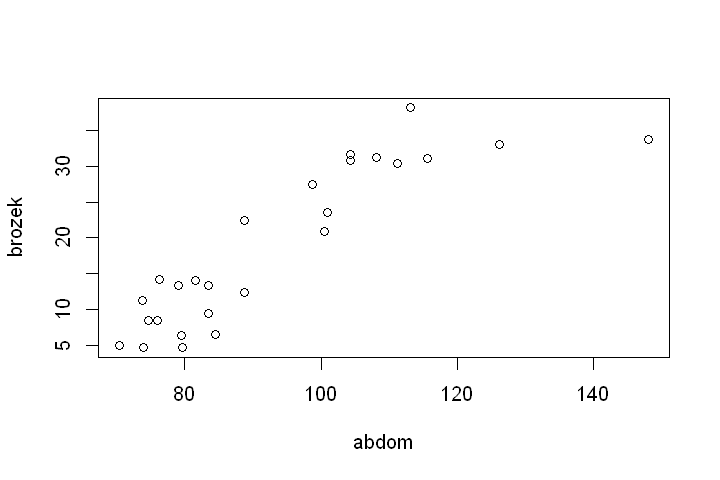

In [22]:
plot(fat[25:50, c('abdom', 'brozek')])

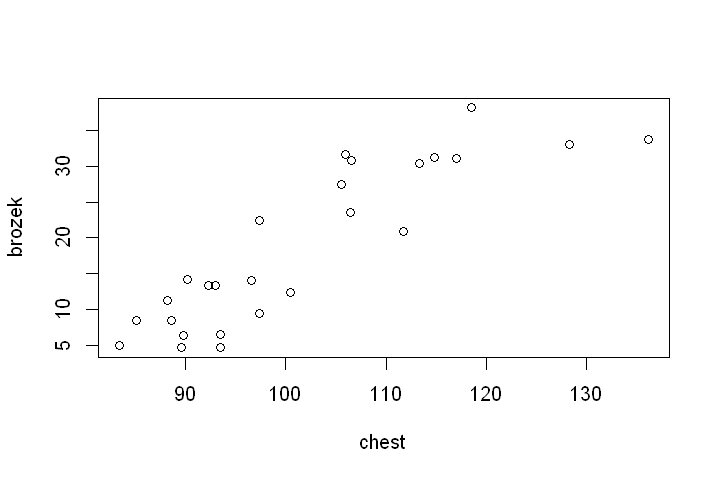

In [23]:
plot(fat[25:50, c('chest', 'brozek')])

* We can clearly see that there are two datapoints (Chest > 120 and abdom > 120) which have high leverage

In [5]:
fat[fat$abdom > 125, ]

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
39,33.8,35.2,1.0202,46,363.15,72.25,48.9,240.5,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
41,33.1,34.5,1.0217,45,262.75,68.75,39.1,175.8,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4


* entry 39 and 41 have high leverage both for chest as well as abdom

<b>(e) Recompute the 95% prediction interval for median predictor values after two anomalous cases have been excluded from the data. Did this make much difference to the outcome?

In [387]:
# remove these two datapoints
fat1 <- fat[-c(39, 41), ]

In [390]:
model4.b1 = lm(brozek ~ age + weight + height + abdom, data = fat1)

In [397]:
predict(model4.b1, data.frame(weight = 176.5, abdom = 90.95, age = 43, height = 70), interval = 'prediction')

fit,lwr,upr
17.90364,9.931719,25.87556


* After removing the two leverage points, following changes occure.

<ol>
<li>Fit changed from 17.84028 to 17.90364</li>
<li>lwr changed from 9.696631 to 9.931719</li>
<li>upr changed from 25.98392 to 25.87556</li>
</ol>
    
* As it can be seen, there is not big change in the response and interval prediction. Hence from preliminary analysis, these two data points are not influential.

_____________

<img src = "prob5.png" >

<img src = "prob5_answer.jpg" >